In [7]:
import os
import re
import pandas as pd

# Directory containing the .txt files
directory = r'C:\Users\ivan\WORK\ПАПАЙИ\Paper 3\individuals'

# List to store data from each file
data = []

# Regex patterns to match the parameters
patterns = {
    'num_layers': r'num_layers:\s*(\d+)',
    'neurons_per_layer': r'neurons_per_layer:\s*\[(.*?)\]',
    'activation_functions': r'activation_functions:\s*\[(.*?)\]',
    'optimizer': r'optimizer:\s*([a-zA-Z0-9_]+)',
    'alpha': r'alpha:\s*([\d.]+)',
    'loss_function': r'loss_function:\s*([a-zA-Z0-9_]+)',
    'accuracy': r'accuracy:\s*([\d.-]+)',
}

# Function to read and parse each file
def parse_txt_file(file_path):
    with open(file_path, 'r') as file:
        content = file.read()
        params = {}
        for key, pattern in patterns.items():
            match = re.search(pattern, content)
            if match:
                if key in ['neurons_per_layer', 'activation_functions']:
                    params[key] = eval('[' + match.group(1) + ']')
                else:
                    params[key] = match.group(1)
            else:
                params[key] = None
        return params

# Iterate over each file in the directory
for filename in os.listdir(directory):
    if filename.endswith('.txt') and 'params' in filename:
        file_path = os.path.join(directory, filename)
        params = parse_txt_file(file_path)
        params['filename'] = filename  # Add filename to parameters
        data.append(params)

# Convert the list of dictionaries to a DataFrame
df = pd.DataFrame(data)

# Define the order of columns as specified
desired_columns = ['num_layers', 'neurons_per_layer', 'activation_functions',
                   'optimizer', 'alpha', 'loss_function', 'accuracy', 'filename']
df = df[desired_columns]

# Remove rows with NaN values
df_ = df.dropna()

# Output Excel file path
output_excel_file = r'output.xlsx'

# Write DataFrame to Excel
df_.to_excel(output_excel_file, index=False)

print(f"Data has been successfully written to {output_excel_file}")


Data has been successfully written to output.xlsx


In [45]:
df = pd.read_excel('output.xlsx')


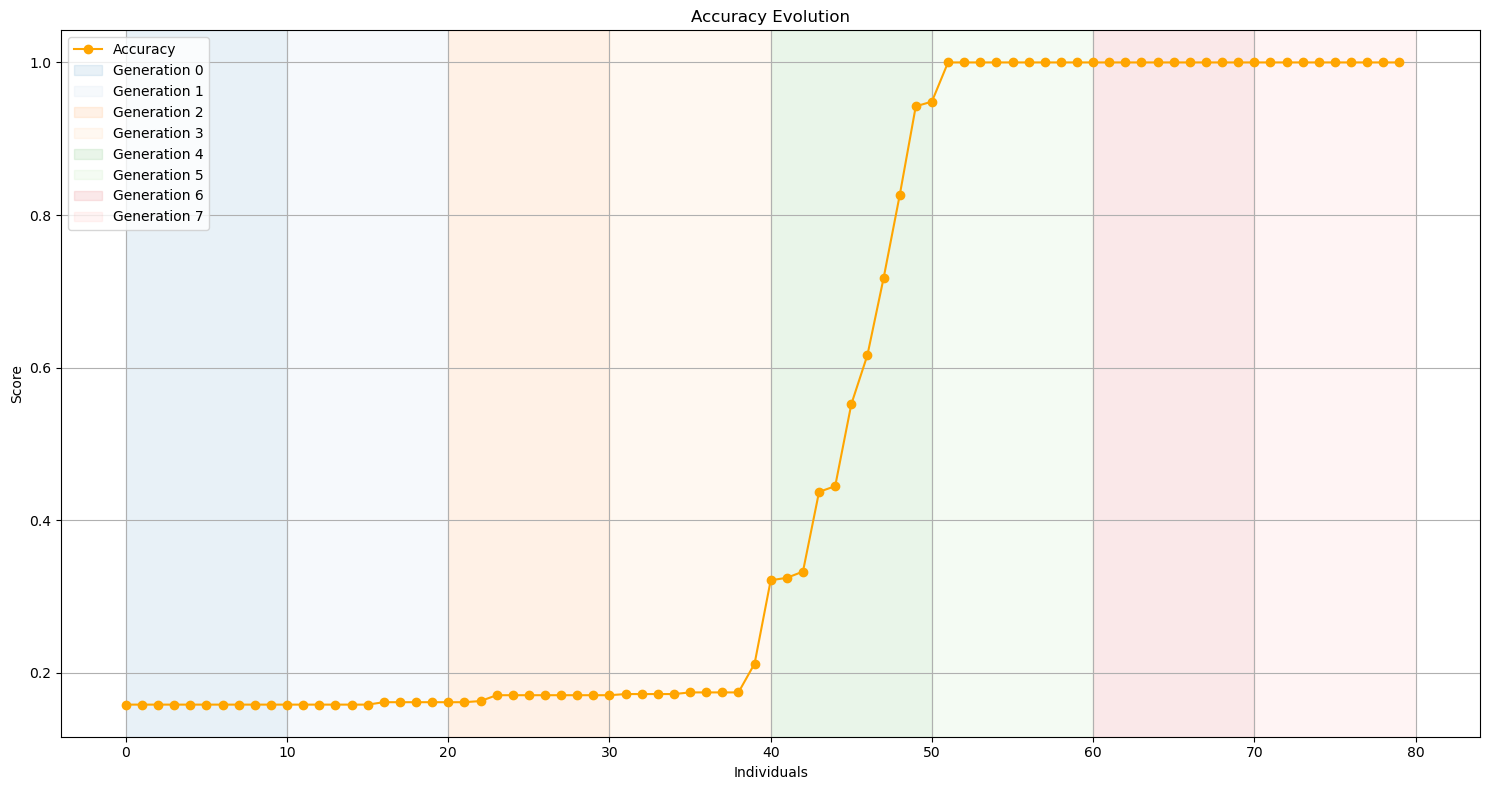

In [9]:
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_excel('output.xlsx')
df = df[df['accuracy'] >0.1].sort_values(by='accuracy', ascending=True)


# Строим график
plt.figure(figsize=(15, 8))

epochs = np.arange(df.shape[0])

# Кривые для validation
#plt.plot(epochs, df['f1_score'], marker='o', linestyle='-', color='blue', label='$F_1$ Score')
plt.plot(epochs, df['accuracy'], marker='o', linestyle='-', color='orange', label='Accuracy')
#plt.plot(epochs, df['precision'], marker='o', linestyle='-', color='green', label='Precision')
#plt.plot(epochs, df['recall'], marker='o', linestyle='-', color='red', label='Recall')

# Кривые для test
#plt.plot(epochs, df['test_accuracy'], marker='o', linestyle='-', color='red', label='test_accuracy')
#plt.plot(epochs, df['test_precision'], marker='o', linestyle='-', color='purple', label='test_precision')
#plt.plot(epochs, df['test_recall'], marker='o', linestyle='-', color='brown', label='test_recall')

# Добавление фона с номерами
#plt.axvspan(0, 19, color='blue', alpha=0.1, label='Generation 0')

for i in range(0, df.shape[0], 10):
    plt.axvspan(i, i + 10, color=plt.cm.tab20(i // 10), alpha=0.1, label=f'Generation {i // 10}')


# Настройки графика
plt.title('Accuracy Evolution')
plt.xlabel('Individuals')
plt.ylabel('Score')
plt.grid(True)
plt.legend()

# Отображение графика
plt.tight_layout()
plt.savefig('indiv.pdf')
plt.show()

In [16]:
df_middle = df[(df['accuracy'] >0.7) & (df['accuracy'] < 1)]
df_middle 

,num_layers,neurons_per_layer,activation_functions,optimizer,alpha,loss_function,accuracy,filename
23,15,"[82, 38, 13, 76, 88, 25, 36, 20, 79, 24, 120, ...","['hard_sigmoid', 'elu', 'softplus', 'tanh', 'g...",adadelta,0.0010,categorical_crossentropy,0.717000,individual_g0_i30_params.txt
48,3,"[53, 96, 1]","['softmax', 'hard_sigmoid', 'elu']",adam,0.0010,categorical_crossentropy,0.825667,individual_g0_i53_params.txt
19,6,"[76, 25, 71, 87, 126, 118]","['gelu', 'linear', 'hard_sigmoid', 'softmax', ...",adamax,0.0001,categorical_crossentropy,0.942500,individual_g0_i27_params.txt
52,9,"[118, 19, 30, 29, 56, 29, 37, 99, 113]","['softplus', 'softplus', 'selu', 'tanh', 'line...",adadelta,0.0010,categorical_crossentropy,0.948667,individual_g0_i57_params.txt


In [37]:
df_cool = df[(df['accuracy'] == 1) & (df['num_layers'] <5)].sample(4)
df_cool

,num_layers,neurons_per_layer,activation_functions,optimizer,alpha,loss_function,accuracy,filename
60,2,"[89, 44]","['softsign', 'hard_sigmoid']",adam,0.0001,categorical_crossentropy,1.0,individual_g0_i64_params.txt
21,2,"[119, 45]","['sigmoid', 'sigmoid']",adamax,0.0010,categorical_crossentropy,1.0,individual_g0_i29_params.txt
5,3,"[30, 86, 15]","['sigmoid', 'softplus', 'sigmoid']",adamax,0.0010,categorical_crossentropy,1.0,individual_g0_i14_params.txt
33,2,"[13, 51]","['softmax', 'gelu']",sgd,0.1000,categorical_crossentropy,1.0,individual_g0_i3_params.txt


In [40]:
df_combined = pd.concat([df_middle, df_cool], ignore_index=True)
df_combined

,num_layers,neurons_per_layer,activation_functions,optimizer,alpha,loss_function,accuracy,filename
0,15,"[82, 38, 13, 76, 88, 25, 36, 20, 79, 24, 120, ...","['hard_sigmoid', 'elu', 'softplus', 'tanh', 'g...",adadelta,0.0010,categorical_crossentropy,0.717000,individual_g0_i30_params.txt
1,3,"[53, 96, 1]","['softmax', 'hard_sigmoid', 'elu']",adam,0.0010,categorical_crossentropy,0.825667,individual_g0_i53_params.txt
2,6,"[76, 25, 71, 87, 126, 118]","['gelu', 'linear', 'hard_sigmoid', 'softmax', ...",adamax,0.0001,categorical_crossentropy,0.942500,individual_g0_i27_params.txt
3,9,"[118, 19, 30, 29, 56, 29, 37, 99, 113]","['softplus', 'softplus', 'selu', 'tanh', 'line...",adadelta,0.0010,categorical_crossentropy,0.948667,individual_g0_i57_params.txt
4,2,"[89, 44]","['softsign', 'hard_sigmoid']",adam,0.0001,categorical_crossentropy,1.000000,individual_g0_i64_params.txt
5,2,"[119, 45]","['sigmoid', 'sigmoid']",adamax,0.0010,categorical_crossentropy,1.000000,individual_g0_i29_params.txt
6,3,"[30, 86, 15]","['sigmoid', 'softplus', 'sigmoid']",adamax,0.0010,categorical_crossentropy,1.000000,individual_g0_i14_params.txt
7,2,"[13, 51]","['softmax', 'gelu']",sgd,0.1000,categorical_crossentropy,1.000000,individual_g0_i3_params.txt


In [41]:
inds = df_combined['filename'].str.extract('i(\d+)_', expand=False).tolist()
inds

['30', '53', '27', '57', '64', '29', '14', '3']

C:\Users\ivan\AppData\Local\Temp\ipykernel_16688\2091796542.py:15: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data = pd.read_csv(file_path, header=None, sep=", ")
C:\Users\ivan\AppData\Local\Temp\ipykernel_16688\2091796542.py:15: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data = pd.read_csv(file_path, header=None, sep=", ")
C:\Users\ivan\AppData\Local\Temp\ipykernel_16688\2091796542.py:15: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by 

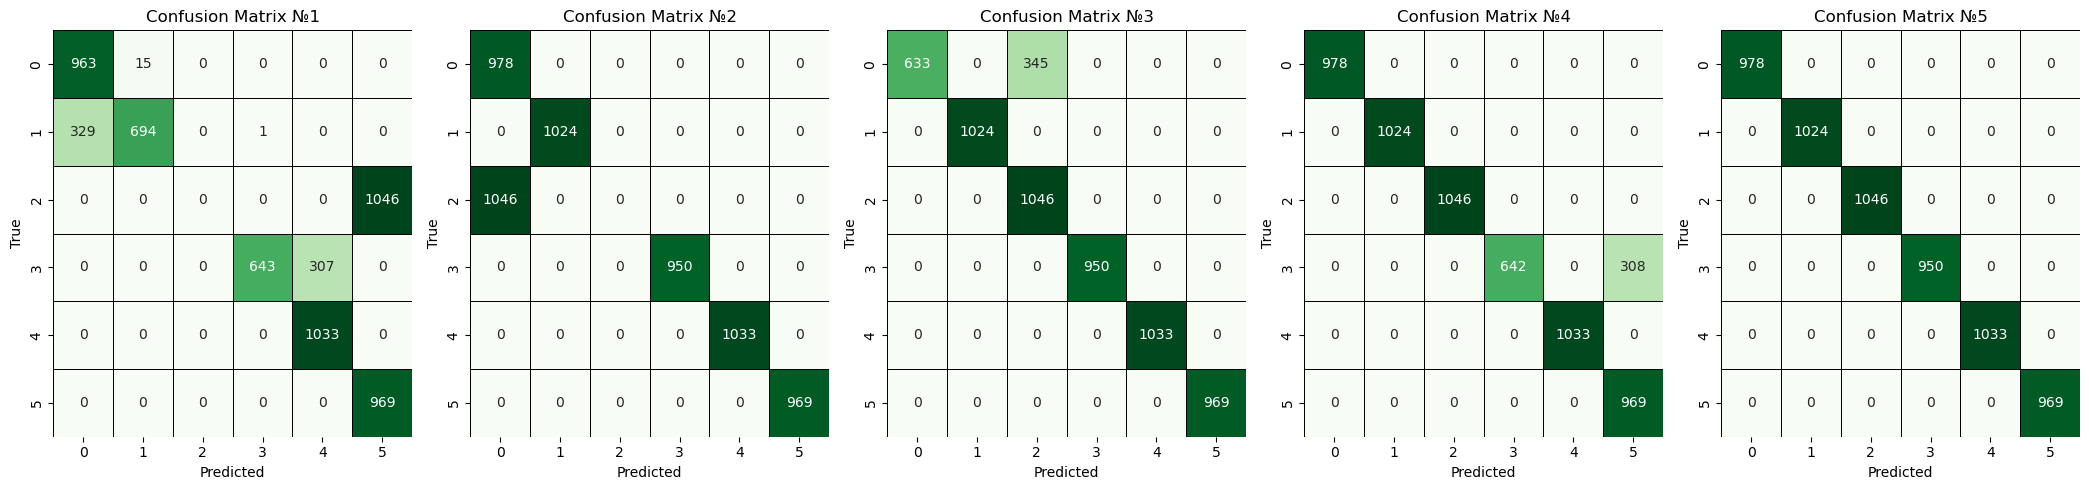

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Example list of indices (replace with your actual list)
inds = [30, 53, 27, 57, 64]

# Create a figure and axis objects for subplots
fig, axes = plt.subplots(1, len(inds), figsize=(21, 5))

for idx, i in enumerate(inds):
    # Чтение данных из файла без заголовков
    file_path = f'individuals/individual_g0_i{i}_predictions.txt'
    data = pd.read_csv(file_path, header=None, sep=", ")

    # Присвоение названий колонкам
    data.columns = ['index', 'true', 'pred']

    # Извлечение истинных и предсказанных значений
    true_classes = data['true']
    predicted_classes = data['pred']

    # Вычисление матрицы конфузий
    conf_matrix = confusion_matrix(true_classes, predicted_classes)

    # Визуализация матрицы конфузий с помощью seaborn
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', cbar=False, linewidths=0.5, linecolor='black', ax=axes[idx])
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('True')
    axes[idx].set_title(f'Confusion Matrix №{idx+1}')

# Adjust layout and display the subplots
plt.tight_layout()
plt.savefig('CMs.pdf')
plt.show()


C:\Users\ivan\AppData\Local\Temp\ipykernel_16688\2879242951.py:18: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data = pd.read_csv(file_path, header=None, sep=", ")
C:\Users\ivan\AppData\Local\Temp\ipykernel_16688\2879242951.py:18: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data = pd.read_csv(file_path, header=None, sep=", ")
C:\Users\ivan\AppData\Local\Temp\ipykernel_16688\2879242951.py:18: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by 

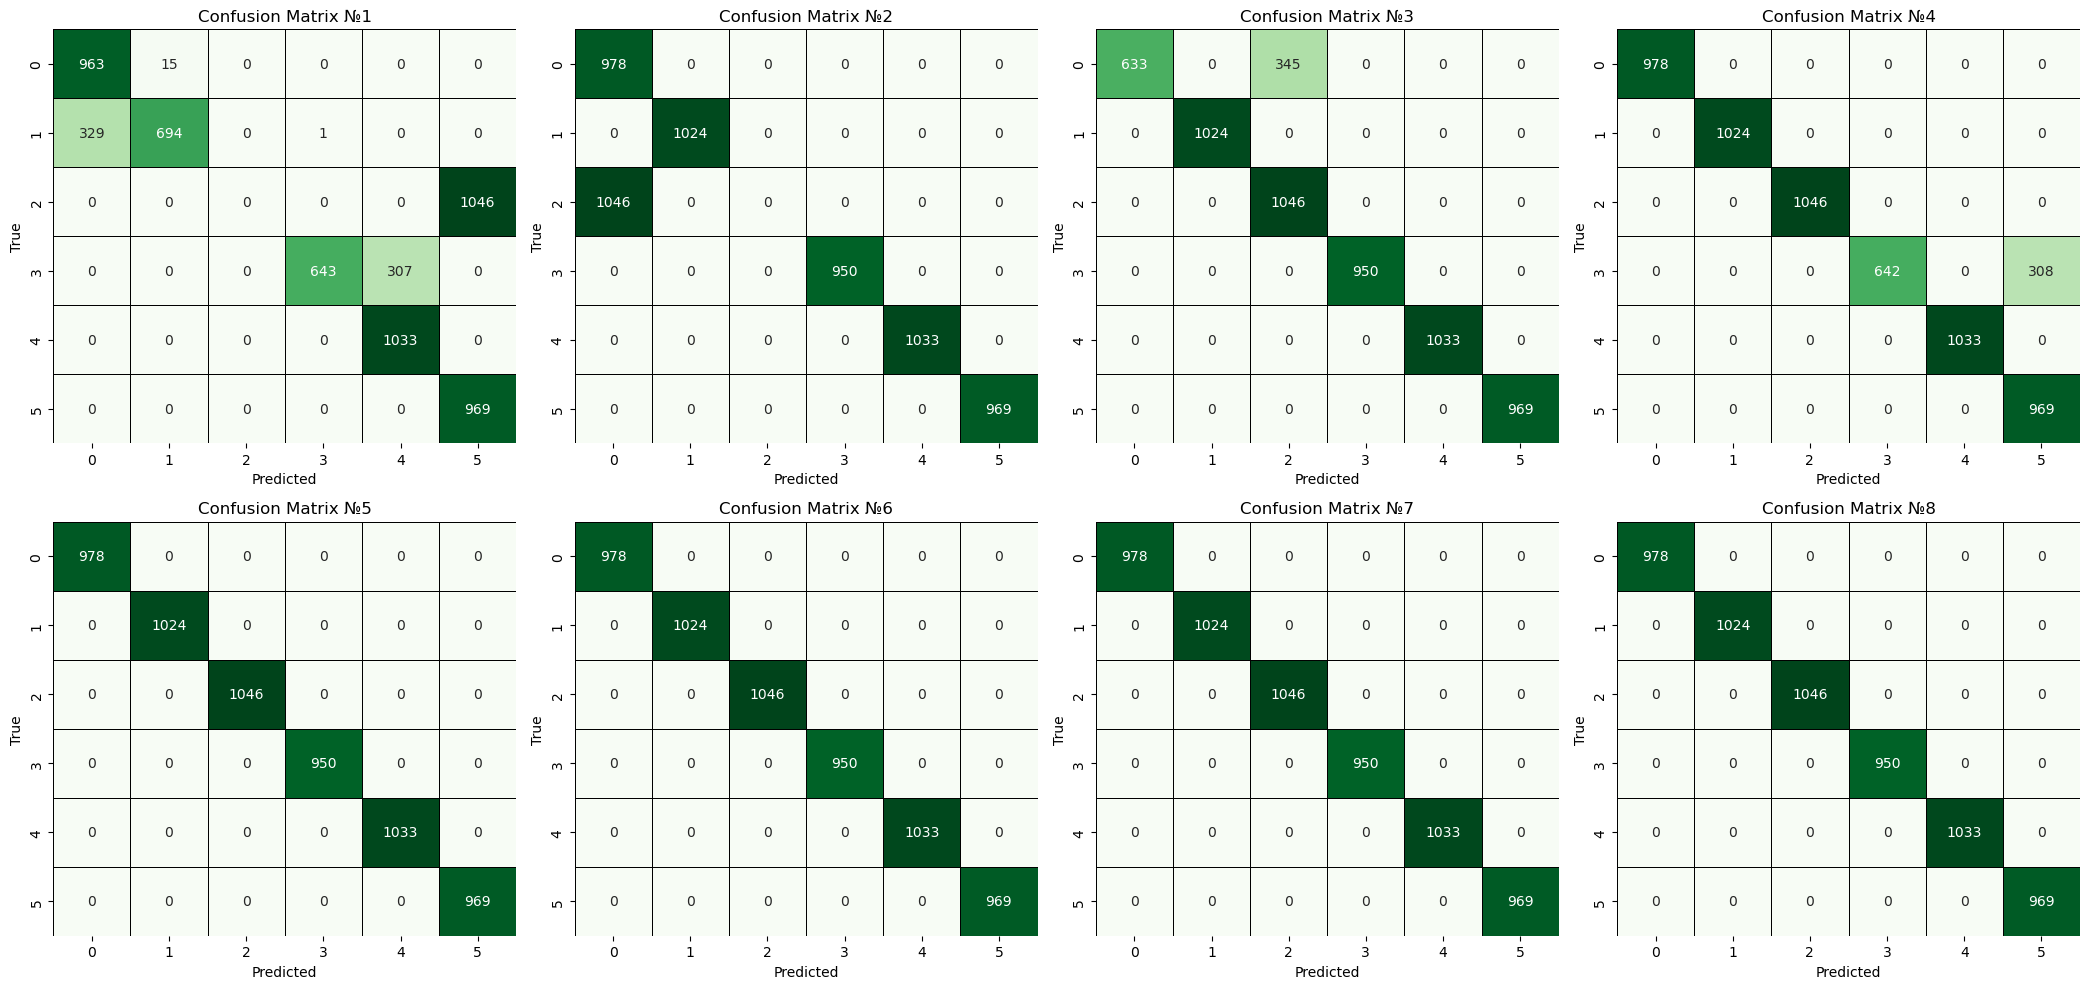

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Example list of indices (replace with your actual list)
#inds = [0, 1, 2, 3, 4, 5, 6]

# Create a figure and axis objects for subplots
fig, axes = plt.subplots(2, 4, figsize=(21, 10))

for idx, i in enumerate(inds):
    row = idx // 4  # Determine which row to place the subplot
    col = idx % 4   # Determine the column within the row

    # Чтение данных из файла без заголовков
    file_path = f'individuals/individual_g0_i{i}_predictions.txt'
    data = pd.read_csv(file_path, header=None, sep=", ")

    # Присвоение названий колонкам
    data.columns = ['index', 'true', 'pred']

    # Извлечение истинных и предсказанных значений
    true_classes = data['true']
    predicted_classes = data['pred']

    # Вычисление матрицы конфузий
    conf_matrix = confusion_matrix(true_classes, predicted_classes)

    # Визуализация матрицы конфузий с помощью seaborn
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', cbar=False, linewidths=0.5, linecolor='black', ax=axes[row, col])
    axes[row, col].set_xlabel('Predicted')
    axes[row, col].set_ylabel('True')
    axes[row, col].set_title(f'Confusion Matrix №{idx+1}')

# Adjust layout and display the subplots
plt.tight_layout()
plt.savefig('CMs.pdf')
plt.show()


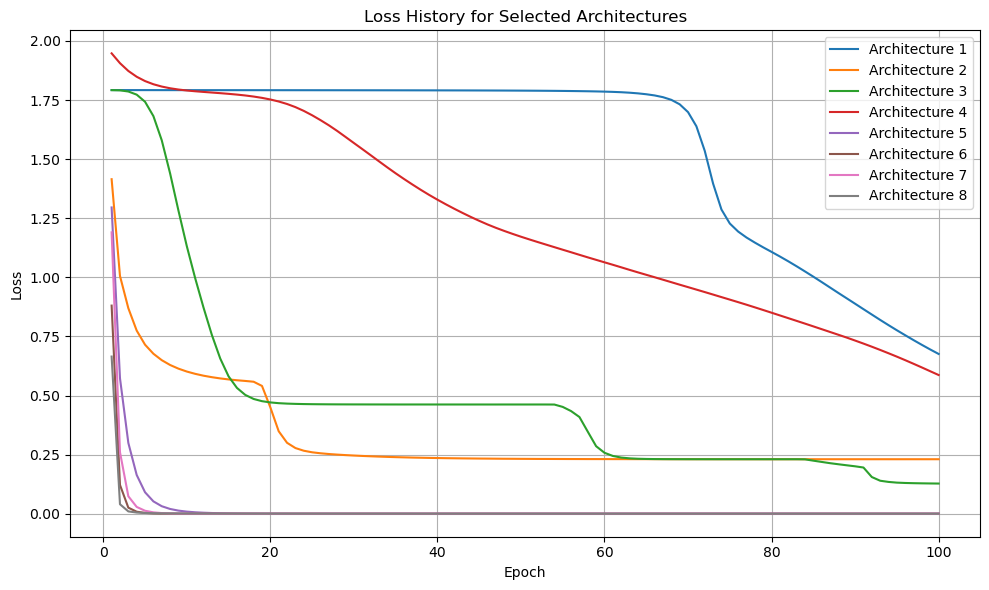

In [61]:
import matplotlib.pyplot as plt
import os

# Пример списка индексов (замените на ваши фактические значения)
inds = [30, 53, 27, 57, 64, 29, 14, 3]
#['30', '53', '27', '57', '64', '29', '14', '3']
plt.figure(figsize=(10, 6))  # Установка размера фигуры

# Цикл по индексам для построения графиков
for idx, i in enumerate(inds):
    # Чтение данных из файла без заголовков
    file_path = f'individuals/individual_g0_i{i}_loss_history.txt'
    
    if os.path.exists(file_path):
        with open(file_path, 'r') as f:
            lines = f.readlines()
            losses = [float(line.strip()) for line in lines]  # Считываем потери как список чисел

        epochs = range(1, len(losses) + 1)  # Создаём список эпох

        # Построение графика для текущего файла
        plt.plot(epochs, losses, label=f'Architecture {idx+1}')

# Настройка внешнего вида графика
plt.title('Loss History for Selected Architectures')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Отображение графика
plt.savefig('epochs.pdf')
plt.show()


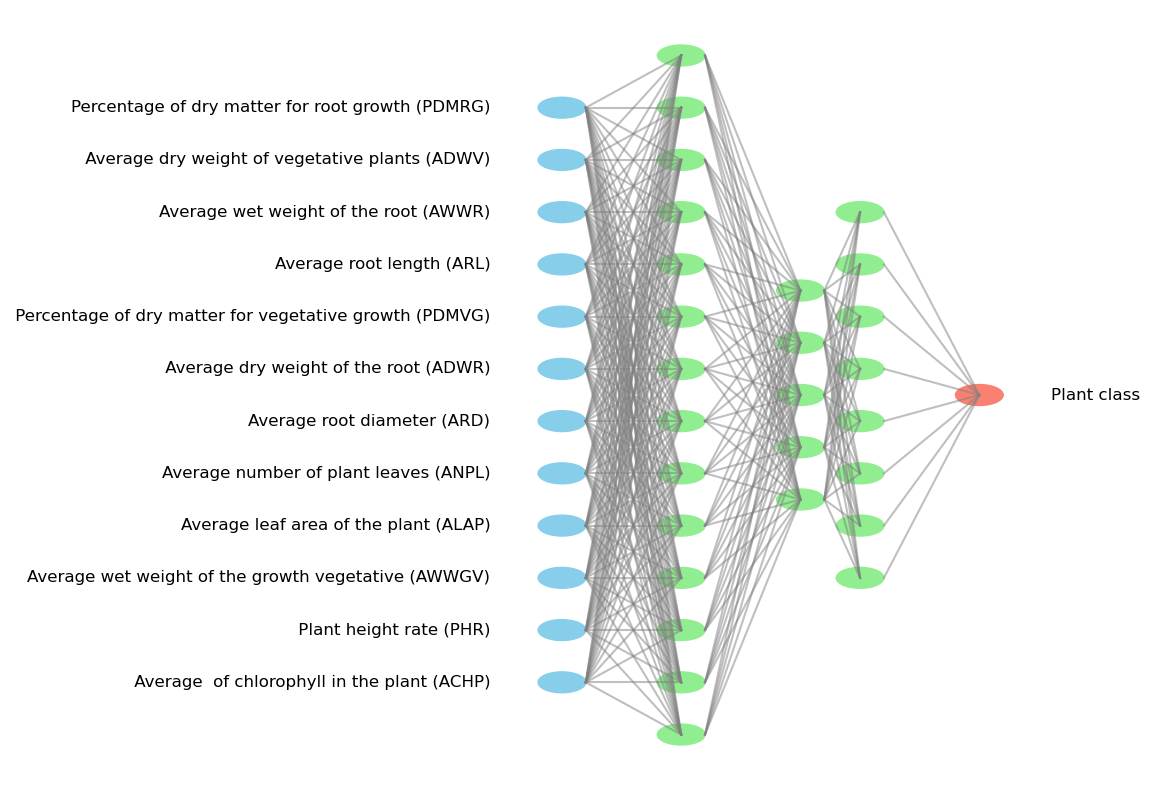

In [66]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Define the figure and axes
fig, ax = plt.subplots(figsize=(12, 8))

# Define node positions
input_nodes = [' Average  of chlorophyll in the plant (ACHP)',
 ' Plant height rate (PHR)',
 'Average wet weight of the growth vegetative (AWWGV)',
 'Average leaf area of the plant (ALAP)',
 'Average number of plant leaves (ANPL)',
 'Average root diameter (ARD)',
 ' Average dry weight of the root (ADWR)',
 ' Percentage of dry matter for vegetative growth (PDMVG)',
 'Average root length (ARL)',
 'Average wet weight of the root (AWWR)',
 ' Average dry weight of vegetative plants (ADWV)',
 'Percentage of dry matter for root growth (PDMRG)']

output_nodes = [
    "Plant class"
]

hidden_layer1_nodes = [f'H1{i+1}' for i in range(14)]
hidden_layer2_nodes = [f'H2{i+1}' for i in range(5)]
hidden_layer3_nodes = [f'H3{i+1}' for i in range(8)]

# Plot input nodes
for i, node in enumerate(input_nodes):
    ax.add_patch(patches.Circle((0, i - len(input_nodes) / 2), radius=0.2, color='skyblue'))
    ax.text(-0.6, i - len(input_nodes) / 2, node, fontsize=12, va='center', ha='right')

# Plot hidden layer 1 nodes
for i, node in enumerate(hidden_layer1_nodes):
    ax.add_patch(patches.Circle((1, i - len(hidden_layer1_nodes) / 2), radius=0.2, color='lightgreen'))
    #ax.text(0.6, i - len(hidden_layer1_nodes) / 2, node, fontsize=10, va='center', ha='left')

# Plot hidden layer 2 nodes
for i, node in enumerate(hidden_layer2_nodes):
    ax.add_patch(patches.Circle((2, i - len(hidden_layer2_nodes) / 2), radius=0.2, color='lightgreen'))
    #ax.text(1.6, i - len(hidden_layer2_nodes) / 2, node, fontsize=10, va='center', ha='left')

# Plot hidden layer 3 nodes
for i, node in enumerate(hidden_layer3_nodes):
    ax.add_patch(patches.Circle((2.5, i - len(hidden_layer3_nodes) / 2), radius=0.2, color='lightgreen'))
    #ax.text(2.1, i - len(hidden_layer3_nodes) / 2, node, fontsize=10, va='center', ha='left')

# Plot output nodes
for i, node in enumerate(output_nodes):
    ax.add_patch(patches.Circle((3.5, i - len(output_nodes) / 2), radius=0.2, color='salmon'))
    ax.text(4.1, i - len(output_nodes) / 2, node, fontsize=12, va='center', ha='left')

# Plot connections between nodes
for i, input_node in enumerate(input_nodes):
    for j, hidden_node in enumerate(hidden_layer1_nodes):
        ax.plot([0.2, 1], [i - len(input_nodes) / 2, j - len(hidden_layer1_nodes) / 2], color='gray', alpha=0.5)

for i, hidden_node in enumerate(hidden_layer1_nodes):
    for j, hidden_node2 in enumerate(hidden_layer2_nodes):
        ax.plot([1.2, 2], [i - len(hidden_layer1_nodes) / 2, j - len(hidden_layer2_nodes) / 2], color='gray', alpha=0.5)

for i, hidden_node in enumerate(hidden_layer2_nodes):
    for j, hidden_node3 in enumerate(hidden_layer3_nodes):
        ax.plot([2.2, 2.5], [i - len(hidden_layer2_nodes) / 2, j - len(hidden_layer3_nodes) / 2], color='gray', alpha=0.5)

for i, hidden_node in enumerate(hidden_layer3_nodes):
    for j, output_node in enumerate(output_nodes):
        ax.plot([2.7, 3.5], [i - len(hidden_layer3_nodes) / 2, j - len(output_nodes) / 2], color='gray', alpha=0.5)

# Remove axes
ax.axis('off')

# Show plot
plt.tight_layout()
plt.savefig('NN.pdf')
plt.show()